In [3]:
import google.generativeai as genai
from elevenlabs import play, save
from elevenlabs.client import ElevenLabs
from dotenv import load_dotenv
import os

# Load environment variables from .env file
load_dotenv()

# Retrieve API keys from environment variables
gemini_api_key = os.getenv('GEMINI_API_KEY')
elevenlabs_api_key = os.getenv('ELEVENLABS_API_KEY')

# set keys
client = ElevenLabs(
  api_key= elevenlabs_api_key # Defaults to ELEVEN_API_KEY
)

genai.configure(api_key=gemini_api_key)


In [4]:
for model in genai.list_models():
  print(model.name)

models/chat-bison-001
models/text-bison-001
models/embedding-gecko-001
models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision
models/embedding-001
models/text-embedding-004
models/aqa


In [5]:
model = genai.GenerativeModel('gemini-1.0-pro-vision-latest')

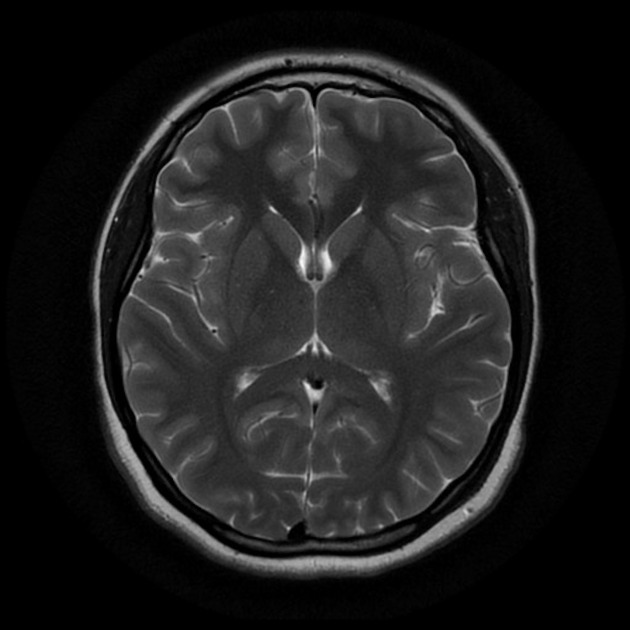

In [9]:
import PIL
img = PIL.Image.open('Data\\BMP.png')
img

In [76]:
response = model.generate_content(img)
print(response.text)

 The test results show that the patient has normal levels of sodium, potassium, chloride, carbon dioxide, glucose, and creatinine. The patient's blood urea nitrogen (BUN) level is slightly elevated, which could indicate that the patient is not adequately hydrated or has a kidney problem. The patient should follow up with their doctor to discuss the results of this test.


In [78]:
text_prompt =  '''
You are an expert in interpreting medical examinations and providing optimal recommendations. 
You will analyze images containing medical examination data. 
Initially, explain the significance of the data presented. 
It is important to maintain a positive outlook throughout your analysis and mention the name (if it exists) to personalize and make it kind. 
Always ensure to include the advice of a specialist doctor for more detailed information and a comprehensive understanding. 
Please respond in simple, direct Arabic without using complex terms.
Finally say 
"مع خالص التقدير روبرتو"'''
response = model.generate_content([text_prompt,img])
print(response.text)

 مرحباً ليا،

أشكرك على إرسالك نتائج فحص الدم الخاص بك. يرجى العلم بأن هذه النتائج طبيعية ولا تدعو للقلق.

إليك بعض التفاصيل حول كل اختبار:

* الصوديوم: 140 مEq/L ( طبيعي)
* البوتاسيوم: 4.0 مEq/L ( طبيعي)
* الكلوريد: 102 مEq/L ( طبيعي)
* ثاني أكسيد الكربون: 25 مEq/L ( طبيعي)
* الجلوكوز: 90 ملغ/ديسيلتر ( طبيعي)
* نيتروجين اليوريا في الدم: 15 ملغ/ديسيلتر ( طبيعي)
* الكرياتينين: 1.0 ملغ/ديسيلتر ( طبيعي)

آمل أن تكون هذه المعلومات مفيدة لك. إذا كانت لديك أي أسئلة أخرى، فلا تتردد في الاتصال بي.

مع خالص التقدير،
روبرتو


In [61]:
response.text

' مرحبا ليا،\n\nأشكرك على إرسالك نتائج فحص الدم الخاص بك. يرجى العلم بأن هذه النتائج طبيعية ولا تدعو للقلق.\n\nالصوديوم: 140 مEq/L ( طبيعي)\nالبوتاسيوم: 4.0 مEq/L ( طبيعي)\nالكلورايد: 102 مEq/L ( طبيعي)\nثاني أكسيد الكربون: 25 مEq/L ( طبيعي)\nالجلوكوز: 90 ملجم/ديسيلتر ( طبيعي)\nيوريا الدم: 15 ملجم/ديسيلتر ( طبيعي)\nالكرياتينين: 1.0 ملجم/ديسيلتر ( طبيعي)\n\nومع ذلك، من المهم دائمًا استشارة طبيبك للحصول على تفسير مفصل لنتائج فحوصاتك.\n\nمع خالص التقدير،\nروبرتو'

In [70]:
from elevenlabs import play, save
from elevenlabs.client import ElevenLabs

client = ElevenLabs()

audio = client.generate(
    text="Hello Ahmad",
    voice="Rachel",
    model="eleven_multilingual_v2"
)

#save(audio, "C:\\Users\\Motasem-PC\\Desktop\\reporto\\reports\\BMP.mp3")


In [72]:
from pydub import AudioSegment
import os

# Assuming client is correctly defined/imported elsewhere in your code
def generate_audio(text):
    try:
        # Generate audio for the given text
        audio_generator = client.generate(
            text=text,
            voice="Rachel",
            model="eleven_multilingual_v2"
        )
        # Convert the generator to bytes
        audio_data = b"".join(audio_generator)
        return audio_data
    except Exception as e:
        print(f"Error generating audio: {e}")
        return None


def split_text(input_text):
    # Split the input text by '\n\n'
    return input_text.split('\n\n')

def process_and_save_audio(input_text, output_directory):
    # Split the input text into segments
    segments = split_text(input_text)
    
    # Process each segment and save as an audio file
    for i, segment in enumerate(segments):
        if segment.strip():  # Check if the segment is not empty
            audio = generate_audio(segment)
            if audio is None:
                print(f"Skipping segment {i+1} due to errors.")
                continue
            file_name = f"{i+1:02}.mp3"  # Format file name as "01", "02", etc.
            file_path = os.path.join(output_directory, file_name)
            with open(file_path, "wb") as file:
                file.write(audio)

# Example usage remains the same
input_text = response.text
# Specify the output directory where the audio files will be saved
output_directory = "reporto\\reports"

# Make sure the output directory exists, if not, it will be created
os.makedirs(output_directory, exist_ok=True)

# Process the text and generate and save audio
process_and_save_audio(input_text, output_directory)


In [73]:
import os
from mutagen.mp3 import MP3
from mutagen.id3 import ID3, TIT2, TPE1, TRCK, TALB

import os

def combine_mp3_files(directory, output_filename):
    # Get all MP3 files in the directory sorted by name
    files = sorted([f for f in os.listdir(directory) if f.endswith('.mp3')])
    if not files:
        print("No MP3 files found in the directory.")
        return

    # Path for the output file
    output_path = os.path.join(directory, output_filename)

    # Combine all MP3 files into one
    with open(output_path, 'wb') as outfile:
        for filename in files:
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as infile:
                outfile.write(infile.read())  # Simply write file data into one file

    print("Files combined into:", output_path)

# Specify the directory containing the audio files
audio_directory = "reporto\\reports"
output_file = "combined_audio.mp3"

# Combine the audio files into one
combine_mp3_files(audio_directory, output_file)


Files combined into: C:\Users\Motasem-PC\Desktop\reporto\reports\combined_audio.mp3
